<a href="https://colab.research.google.com/github/Izzah-Khursheed/Smart-Urban-Planning---Traffic-Flow-Optimizer/blob/main/Data_Fetching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI-powered Smart Urban Planning & Traffic Flow Optimizer**

In [2]:
# Install OSMnx for OpenStreetMap
!pip install osmnx folium geopandas

# Install SUMO Traffic Simulator
!apt-get update
!apt-get install -y sumo sumo-tools sumo-doc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 1.7 MB/s eta 0:00:00
Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,317 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updat

In [3]:
!pip install osmnx networkx matplotlib requests folium pandas

In [4]:
!pip install --upgrade --force-reinstall osmnx folium geopandas

  Using cached osmnx-2.0.1-py3-none-any.whl.metadata (4.9 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.9 MB/s eta 0:00:00
Using cached osmnx-2.0.1-py3-none-any.whl (99 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [1]:
!pip install osmnx requests

In [2]:
import osmnx as ox
print(ox.__version__)

2.0.1


In [ ]:
import requests
import json
from google.colab import userdata

# Your API Key (Replace with your actual key from LocationIQ, OpenCage, etc.)
API_KEY = userdata.get('LocationIQ')

# Define Overpass API URL
overpass_url = "http://overpass-api.de/api/interpreter"
nominatim_url = "https://us1.locationiq.com/v1/search.php"  # Using LocationIQ's API

# List of cities to fetch data for
cities = ["Faisalabad", "Lahore", "Karachi", "Islamabad"]

# Define highway types to ensure we fetch all relevant roads
highway_types = [
    "motorway", "trunk", "primary", "secondary", "tertiary",
    "unclassified", "residential", "service", "living_street"
]

for city in cities:
    print(f"Fetching bounding box for {city}...")

    # Use Nominatim API to get bounding box for the city
    nominatim_params = {
        "key": API_KEY,  # API key for LocationIQ
        "q": city + ", Pakistan",
        "format": "json",
        "limit": 1
    }
    response = requests.get(nominatim_url, params=nominatim_params)

    if response.status_code == 200:
        geo_data = response.json()
        if geo_data:
            bbox = [
                float(geo_data[0]["boundingbox"][0]),  # Min Lat
                float(geo_data[0]["boundingbox"][2]),  # Min Lon
                float(geo_data[0]["boundingbox"][1]),  # Max Lat
                float(geo_data[0]["boundingbox"][3])   # Max Lon
            ]
            print(f"Bounding box for {city}: {bbox}")

            # Construct Overpass Query using the fetched bounding box
            overpass_query = f"""
            [out:json][timeout:90];
            (
              way["highway"]({bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]});
            );
            out body;
            >;
            out skel qt;
            """

            print(f"Fetching road data for {city}...")

            # Send request to Overpass API
            response = requests.get(overpass_url, params={'data': overpass_query})

            if response.status_code == 200:
                data = response.json()
                num_elements = len(data.get('elements', []))
                print(f"Total road elements fetched for {city}: {num_elements}")

                # Save JSON data to a file
                filename = f"{city.lower()}_roads.json"
                with open(filename, "w") as f:
                    json.dump(data, f, indent=4)

                print(f"Road data saved to '{filename}'\n")
            else:
                print(f"Failed to fetch road data for {city}, HTTP Status Code: {response.status_code}\n")
        else:
            print(f"Failed to retrieve bounding box for {city}. Check API key and response format.\n")
    else:
        print(f"Failed to connect to Nominatim API for {city}, HTTP Status Code: {response.status_code}\n")

Fetching bounding box for Faisalabad...
Bounding box for Faisalabad: [31.335641, 72.99379, 31.526443, 73.193035]
Fetching road data for Faisalabad...
Total road elements fetched for Faisalabad: 93740
Road data saved to 'faisalabad_roads.json'

Fetching bounding box for Lahore...
Bounding box for Lahore: [31.4056822, 74.1541829, 31.7256822, 74.4741829]
Fetching road data for Lahore...
Total road elements fetched for Lahore: 361326
Road data saved to 'lahore_roads.json'

Fetching bounding box for Karachi...
Bounding box for Karachi: [24.4273517, 66.2862312, 25.676796, 67.5827753]
Fetching road data for Karachi...
Total road elements fetched for Karachi: 577423
Road data saved to 'karachi_roads.json'

Fetching bounding box for Islamabad...
Bounding box for Islamabad: [33.5338118, 72.9051511, 33.8538118, 73.2251511]
Fetching road data for Islamabad...
Total road elements fetched for Islamabad: 303866
Road data saved to 'islamabad_roads.json'



In [ ]:
import requests
import json

# Define Overpass API URL
overpass_url = "http://overpass-api.de/api/interpreter"

# Dictionary with city names and their respective bounding boxes (latitude/longitude)
city_bounding_boxes = {
    "Faisalabad": [31.325, 73.000, 31.525, 73.300],  # (min lat, min lon, max lat, max lon)
    "Lahore": [31.400, 74.100, 31.700, 74.500],
    "Karachi": [24.750, 66.700, 25.350, 67.500],
    "Islamabad": [33.600, 72.800, 33.850, 73.200]
}

# Define highway types to ensure we fetch all relevant roads
highway_types = [
    "motorway", "trunk", "primary", "secondary", "tertiary",
    "unclassified", "residential", "service", "living_street"
]

for city, bbox in city_bounding_boxes.items():
    print(f"Fetching road data for {city}...")

    # Construct Overpass Query using bounding box instead of area ID
    overpass_query = f"""
    [out:json][timeout:90];
    (
      way["highway"]({bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]});
    );
    out body;
    >;
    out skel qt;
    """

    # Send request
    response = requests.get(overpass_url, params={'data': overpass_query})

    # Check if request was successful
    if response.status_code == 200:
        data = response.json()

        # Check for elements
        num_elements = len(data.get('elements', []))
        print(f"Total road elements fetched for {city}: {num_elements}")

        # Save JSON data to a file
        filename = f"{city.lower()}_roads.json"
        with open(filename, "w") as f:
            json.dump(data, f, indent=4)

        print(f"Road data saved to '{filename}'\n")
    else:
        print(f"Failed to fetch road data for {city}, HTTP Status Code: {response.status_code}\n")

Fetching road data for Faisalabad...
Total road elements fetched for Faisalabad: 107714
Road data saved to 'faisalabad_roads.json'

Fetching road data for Lahore...
Total road elements fetched for Lahore: 386315
Road data saved to 'lahore_roads.json'

Fetching road data for Karachi...
Total road elements fetched for Karachi: 557622
Road data saved to 'karachi_roads.json'

Fetching road data for Islamabad...
Total road elements fetched for Islamabad: 260196
Road data saved to 'islamabad_roads.json'



📍 Fetching Faisalabad road network...


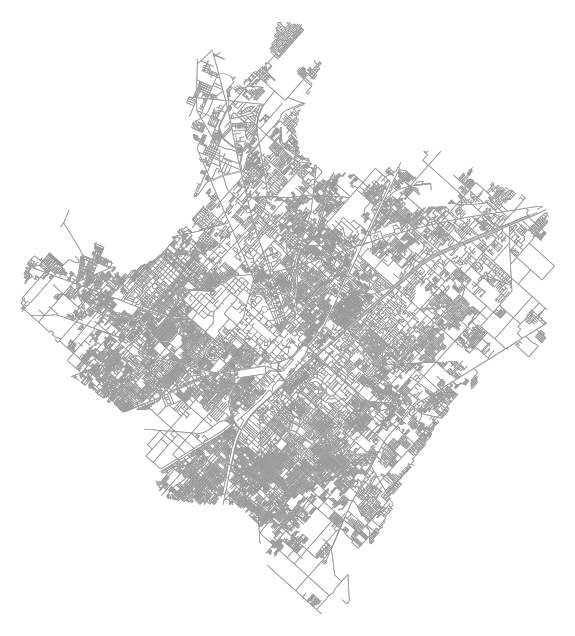

✅ Faisalabad road network fetched and plotted.
📍 Geocoded Address: Faisalabad, Punjab, Pakistan → (31.40412, 73.09034)

🔄 Fetching latest HERE traffic data...
❌ HERE API Error: 403 | {
  "title" : "Forbidden.",
  "status" : 403,
  "code" : "403403",
  "cause" : "App j2OgOCS1JkzBhuAAaYoZ credentials do not authorize access to perform GET action on hrn:here:tdaflowinc::HERE:traffic_63_incidents via SERVICE-3839cf60-7483-43a1-98c9-3d150a4d9af0 because no matching permissions found for the identity, its groups and roles, or the realm.",
  "action" : "Add/Share the necessary permissions to the identity.",
  "correlationId" : "83ac30d8-30a2-4c81-aeb8-eec481fd4b70",
  "error" : "Forbidden",
  "details" : [ ],
  "error_description" : "These credentials do not authorize access"
}


⏳ Waiting for 5 minutes before the next update...


KeyboardInterrupt: 

In [3]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import requests
import folium
import pandas as pd
import time
from google.colab import userdata
# 📍 Define the location for Faisalabad road network
place_name = "Faisalabad, Punjab, Pakistan"

# 🛣️ Fetch road network from OpenStreetMap
print("📍 Fetching Faisalabad road network...")
graph = ox.graph_from_place(place_name, network_type="drive")

# 🎨 Plot Faisalabad Road Map
fig, ax = ox.plot_graph(graph, node_size=0, edge_linewidth=0.5, bgcolor="white")
print("✅ Faisalabad road network fetched and plotted.")

# 🚦 HERE API Key (Replace with your actual API key)
HERE_API_KEY = userdata.get('HERE')
HERE_GEOCODE_URL = "https://geocode.search.hereapi.com/v1/geocode"
HERE_TRAFFIC_URL = "https://traffic.ls.hereapi.com/traffic/6.3/incidents.json?apiKey=h49khz8z-evxnh14MZvCNMN4A-kxlcci1Rt8S9iRUGw&bbox=31.320,73.001;31.550,73.200"

# Function to geocode an address using HERE API
def geocode_address(address):
    params = {
        "q": address,
        "apiKey": HERE_API_KEY
    }
    response = requests.get(HERE_GEOCODE_URL, params=params)

    if response.status_code == 200:
        data = response.json()
        if "items" in data and len(data["items"]) > 0:
            lat = data["items"][0]["position"]["lat"]
            lon = data["items"][0]["position"]["lng"]
            print(f"📍 Geocoded Address: {address} → ({lat}, {lon})")
            return lat, lon
        else:
            print(f"❌ No results found for address: {address}")
    else:
        print(f"❌ Geocoding failed: {response.status_code} | {response.text}")
    return None, None

# Example Usage: Convert an address to coordinates
address = "Faisalabad, Punjab, Pakistan"
lat, lon = geocode_address(address)

# 🚦 Fetch live traffic incidents from HERE API
def fetch_here_traffic():
    params = {
        "apiKey": HERE_API_KEY,
        "bbox": "31.320,73.001;31.550,73.200",  # Faisalabad bounding box
        "criticality": "critical,major,minor",
        "maxresults": 100,
        "language": "en"
    }

    response = requests.get(HERE_TRAFFIC_URL, params=params)

    if response.status_code == 200:
        print("✅ HERE Traffic Data Fetched Successfully!")
        return response.json()
    else:
        print(f"❌ HERE API Error: {response.status_code} | {response.text}")
        return None

# Process and display traffic incidents
def process_incidents(data):
    if "TRAFFIC_ITEMS" in data:
        incidents_list = []
        print("\n🚦 Live Traffic in Faisalabad:")

        for item in data["TRAFFIC_ITEMS"]["TRAFFIC_ITEM"]:
            incident_type = item["TRAFFIC_ITEM_TYPE_DESC"]
            criticality = item["CRITICALITY"]["DESCRIPTION"]
            road = item["ROADS"][0]["DESCRIPTION"] if "ROADS" in item else "Unknown Road"
            print(f"🚧 {incident_type} on {road} | Severity: {criticality}")
            print("-" * 50)

            incidents_list.append({
                "Road": road,
                "Incident Type": incident_type,
                "Severity": criticality
            })

        return pd.DataFrame(incidents_list) if incidents_list else None
    return None

# Visualize traffic-aware routes on a map
def visualize_traffic(data):
    map_faisalabad = folium.Map(location=[31.4504, 73.1350], zoom_start=12)

    # Add road network (OSM)
    for _, _, data in graph.edges(data=True):
        if 'geometry' in data:
            folium.PolyLine(
                [(lat, lon) for lon, lat in data['geometry'].coords],
                color="blue",
                weight=1.5,
                opacity=0.7
            ).add_to(map_faisalabad)

    # Add traffic incidents
    if "TRAFFIC_ITEMS" in data:
        for item in data["TRAFFIC_ITEMS"]["TRAFFIC_ITEM"]:
            if "LOCATION" in item and "GEOLOC" in item["LOCATION"]:
                lat = item["LOCATION"]["GEOLOC"]["LATITUDE"]
                lon = item["LOCATION"]["GEOLOC"]["LONGITUDE"]
                severity = item["CRITICALITY"]["DESCRIPTION"]
                folium.Marker(
                    [lat, lon],
                    popup=f"🚦 {item['TRAFFIC_ITEM_TYPE_DESC']} | {severity}",
                    icon=folium.Icon(color="red" if "critical" in severity.lower() else "orange")
                ).add_to(map_faisalabad)

    # Save the map as an HTML file
    map_faisalabad.save("faisalabad_traffic_here.html")
    print("\n🗺️ Live Faisalabad Traffic Map saved as 'faisalabad_traffic_here.html'")

# Main loop to update traffic data every 5 minutes
if __name__ == "__main__":
    while True:
        print("\n🔄 Fetching latest HERE traffic data...")
        traffic_data = fetch_here_traffic()

        if traffic_data:
            process_incidents(traffic_data)
            visualize_traffic(traffic_data)

        print("\n⏳ Waiting for 5 minutes before the next update...")
        time.sleep(300)  # Wait for 300 seconds (5 minutes)

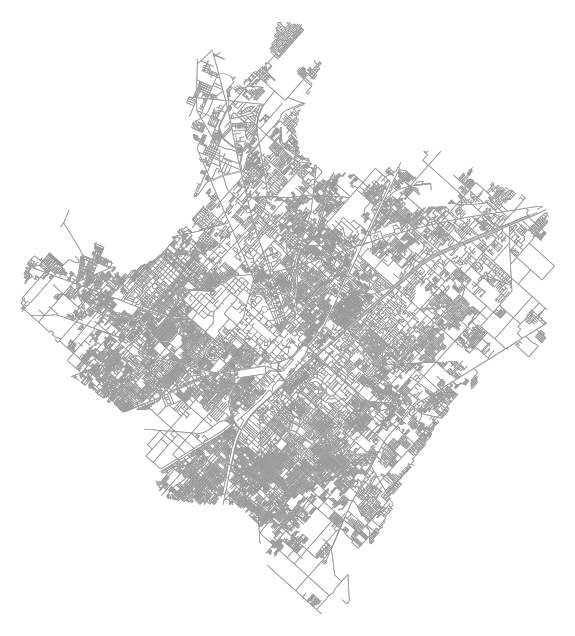

In [ ]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Define the location for traffic data
place_name = "Faisalabad, Punjab, Pakistan"

# Fetch road network from OpenStreetMap
graph = ox.graph_from_place(place_name, network_type="drive")

# Plot the road network
fig, ax = ox.plot_graph(graph, node_size=0, edge_linewidth=0.5, bgcolor="white")

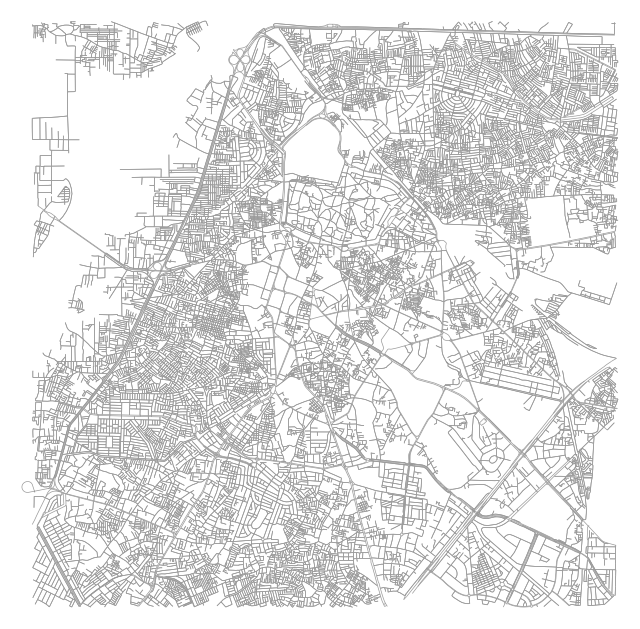

In [ ]:
# Define the location for traffic data
place_name1 = "Lahore, Punjab, Pakistan"

# Fetch road network from an address (better than place-based geocoding)
graph1 = ox.graph_from_address(place_name1, network_type="drive", dist=5000)  # 5km radius

# Plot the road network
fig1, ax1 = ox.plot_graph(graph1, node_size=0, edge_linewidth=0.5, bgcolor="white")

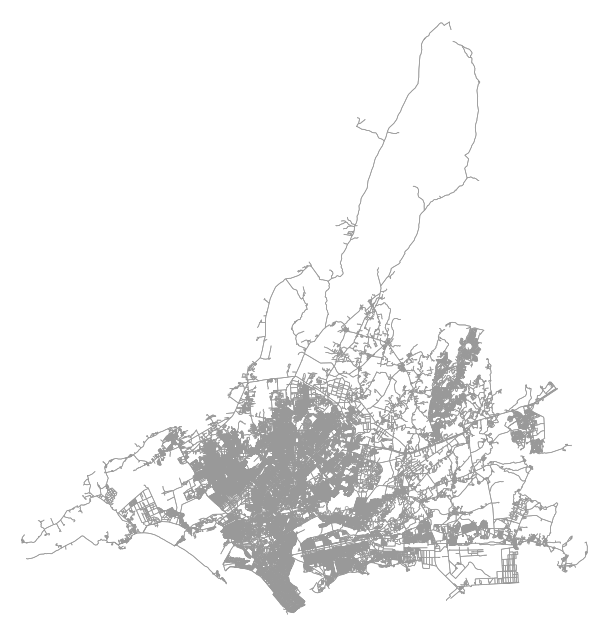

In [ ]:
# Define the location for traffic data
place_name2 = "Karachi, Sindh, Pakistan"

# Fetch road network from OpenStreetMap
graph2 = ox.graph_from_place(place_name2, network_type="drive")

# Plot the road network
fig2, ax2 = ox.plot_graph(graph2, node_size=0, edge_linewidth=0.5, bgcolor="white")

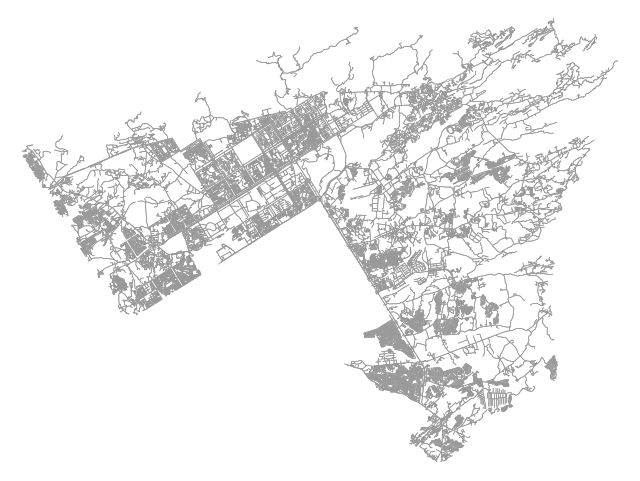

In [ ]:
# Define the location for traffic data
place_name3 = "Islamabad, Pakistan"

# Fetch road network from OpenStreetMap
graph3 = ox.graph_from_place(place_name3, network_type="drive")

# Plot the road network
fig3, ax3 = ox.plot_graph(graph3, node_size=0, edge_linewidth=0.5, bgcolor="white")

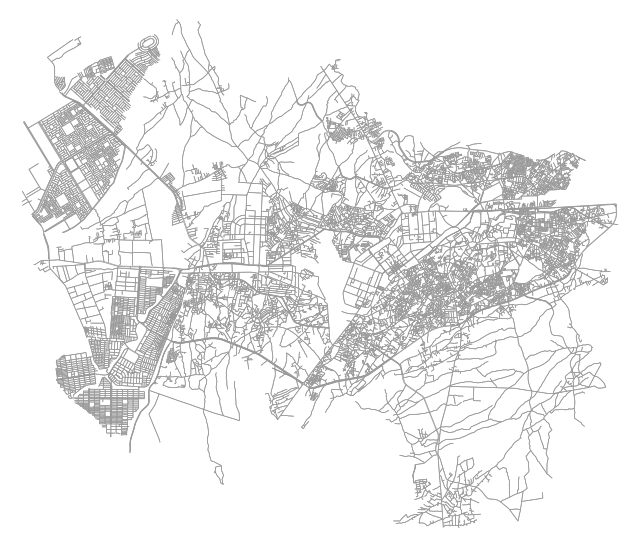

In [ ]:
# Define the location for traffic data
place_name4 = "Peshawar, Pakistan"

# Fetch road network from OpenStreetMap
graph4 = ox.graph_from_place(place_name4, network_type="drive")

# Plot the road network
fig3, ax3 = ox.plot_graph(graph4, node_size=0, edge_linewidth=0.5, bgcolor="white")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset (Update the file path!)
file_path = "/content/drive/My Drive/uber_movement.csv"
df = pd.read_csv(file_path)

# Display dataset structure
print("✅ Dataset loaded successfully! Preview:\n")
print(df.head())  # Show first 5 rows

# Display column names
print("\n📝 Column Names:", df.columns.tolist())

# Show basic info about the dataset
print("\n📊 Dataset Info:\n")
print(df.info())

# Display summary statistics (numerical columns)
print("\n📈 Summary Statistics:\n")
print(df.describe())

# Show missing values count in each column
print("\n⚠️ Missing Values:\n")
print(df.isnull().sum())

✅ Dataset loaded successfully! Preview:

   Origin Movement ID       Origin Display Name  \
0                 183  SANTA INES, 003107 (183)   
1                 183  SANTA INES, 003107 (183)   
2                 183  SANTA INES, 003107 (183)   
3                 183  SANTA INES, 003107 (183)   
4                 183  SANTA INES, 003107 (183)   

                                     Origin Geometry  Destination Movement ID  \
0  [[-74.081141,4.595074],[-74.081746,4.595449],[...                        4   
1  [[-74.081141,4.595074],[-74.081746,4.595449],[...                        6   
2  [[-74.081141,4.595074],[-74.081746,4.595449],[...                        8   
3  [[-74.081141,4.595074],[-74.081746,4.595449],[...                        9   
4  [[-74.081141,4.595074],[-74.081746,4.595449],[...                       11   

     Destination Display Name  \
0     PALO BLANCO, 005501 (4)   
1   BANCO CENTRAL, 007208 (6)   
2   LA ESTANZUELA, 004104 (8)   
3      LAS NIEVES, 003102 (9)   
